In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from xgboost import XGBRegressor


In [19]:
df = pd.read_csv('data/stud.csv')

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [22]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [23]:
num_features

['math_score', 'reading_score', 'writing_score']

In [25]:
X = df.drop(['math_score'],axis = 1)

In [26]:
y = df['math_score']

In [28]:
num_features.remove('math_score')

In [30]:
from sklearn.compose import ColumnTransformer

In [31]:
ohe = OneHotEncoder()
scaler = StandardScaler()

transformer = ColumnTransformer(
    [
        ('OneHotEncoder',ohe,cat_features),
        ('StandardScaler',scaler,num_features)
    ]
)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train =transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [44]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),  
    "XGBRegressor": XGBRegressor()
}

def eval_model(y_test,y_pred):
    print("MSE : ",mean_squared_error(y_test,y_pred))
    print("MAE : ",mean_absolute_error(y_test,y_pred))
    score = r2_score(y_test,y_pred)
    print("R2 Score : ",score)
    return score

In [45]:
performance_matrix = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('-'*10,name,'-'*10)
    print(' '*10,"Training Data Performance\n")
    eval_model(y_train,y_pred)
    print(' '*10,"\nTesting Data Performance\n")
    val = eval_model(y_test,y_pred_test)
    performance_matrix[name] = val




---------- LinearRegression ----------
           Training Data Performance

MSE :  28.203505208333333
MAE :  4.253916666666667
R2 Score :  0.873633864661054
           
Testing Data Performance

MSE :  29.76975
MAE :  4.3275
R2 Score :  0.8789964117927893
---------- Lasso ----------
           Training Data Performance

MSE :  42.86250450058485
MAE :  5.1795714149742285
R2 Score :  0.8079540466804563
           
Testing Data Performance

MSE :  44.22324433196244
MAE :  5.218411335948425
R2 Score :  0.8202480287428799
---------- Ridge ----------
           Training Data Performance

MSE :  28.063988501446364
MAE :  4.236869363734476
R2 Score :  0.874258970899952
           
Testing Data Performance

MSE :  30.019015966746682
MAE :  4.335450652439718
R2 Score :  0.8779832330998446
---------- RandomForestRegressor ----------
           Training Data Performance

MSE :  5.389723460327958
MAE :  1.8477639682539684
R2 Score :  0.975851280924257
           
Testing Data Performance

MSE :  3

In [46]:
performance_matrix

{'LinearRegression': 0.8789964117927893,
 'Lasso': 0.8202480287428799,
 'Ridge': 0.8779832330998446,
 'RandomForestRegressor': 0.8467076644045892,
 'AdaBoostRegressor': 0.8468795352684326,
 'KNeighborsRegressor': 0.8060011260053584,
 'DecisionTreeRegressor': 0.7514548354724335,
 'SVR': 0.7243845188119464,
 'CatBoostRegressor': 0.8550681516656007,
 'XGBRegressor': 0.8362900821060073}

In [53]:
pm = pd.DataFrame(performance_matrix.items(),columns=['Model','R2 Score']).sort_values(by='R2 Score',ascending=False)

In [54]:
pm

,Model,R2 Score
0,LinearRegression,0.878996
2,Ridge,0.877983
8,CatBoostRegressor,0.855068
4,AdaBoostRegressor,0.846880
3,RandomForestRegressor,0.846708
9,XGBRegressor,0.836290
1,Lasso,0.820248
5,KNeighborsRegressor,0.806001
6,DecisionTreeRegressor,0.751455
7,SVR,0.724385


In [58]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [62]:
model.coef_

array([-1.79933649e+13, -1.79933649e+13,  3.00057704e+14,  3.00057704e+14,
        3.00057704e+14,  3.00057704e+14,  3.00057704e+14, -1.86046381e+14,
       -1.86046381e+14, -1.86046381e+14, -1.86046381e+14, -1.86046381e+14,
       -1.86046381e+14, -1.01536288e+13, -1.01536288e+13,  2.58269504e+14,
        2.58269504e+14,  3.32513793e+00,  1.08364712e+01])

In [63]:
model.intercept_

-344133833348649.75

<Axes: xlabel='math_score'>

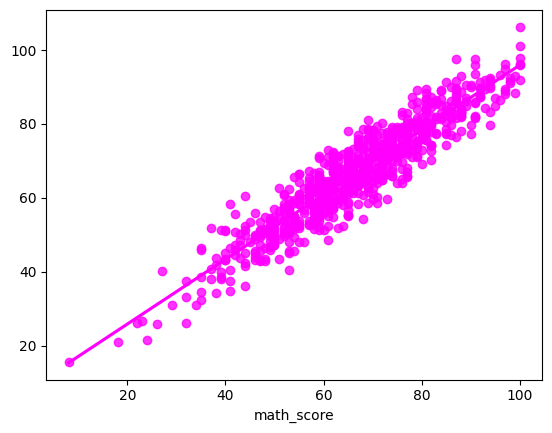

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_train,y=model.predict(X_train),ci=None,color='magenta')